In [1094]:
import pandas as pd
import numpy as np  


In [1095]:
num_samples = 10

random_state = 16

num_of_ratios = 5

Load the metadata file. We index it by sample_id, but keep this column as well as a feature

In [1096]:
metadata = pd.read_csv("../Data/metadata.csv").set_index('sample_id',drop = False)

metadata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1494 entries, S0000 to S1505
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   sample_id          1494 non-null   object
 1   split              1494 non-null   object
 2   instrument_type    1494 non-null   object
 3   features_path      1494 non-null   object
 4   features_md5_hash  1494 non-null   object
dtypes: object(5)
memory usage: 70.0+ KB


In [1097]:
metadata.head()

,sample_id,split,instrument_type,features_path,features_md5_hash
sample_id,,,,,
S0000,S0000,train,commercial,train_features/S0000.csv,017b9a71a702e81a828e6242aa15f049
S0001,S0001,train,commercial,train_features/S0001.csv,0d09840214054d254bd49436c6a6f315
S0002,S0002,train,commercial,train_features/S0002.csv,3f58b3c9b001bfed6ed4e4f757083e09
S0003,S0003,train,commercial,train_features/S0003.csv,e9a12f96114a2fda60b36f4c0f513fb1
S0004,S0004,train,commercial,train_features/S0004.csv,b67603d3931897bfa796ac42cc16de78


We complete the paths in the "features_path" column so that we can read the corresponding csv files more easily.

In [1098]:
def replace_value (x):
    return x.replace(" ","")

new_path = "../Data/"

def fix_path(incomplete_path):
    return new_path + incomplete_path

metadata.features_path = metadata['features_path'].apply(replace_value)
metadata.features_path = metadata['features_path'].apply(fix_path)

metadata.head()

,sample_id,split,instrument_type,features_path,features_md5_hash
sample_id,,,,,
S0000,S0000,train,commercial,../Data/train_features/S0000.csv,017b9a71a702e81a828e6242aa15f049
S0001,S0001,train,commercial,../Data/train_features/S0001.csv,0d09840214054d254bd49436c6a6f315
S0002,S0002,train,commercial,../Data/train_features/S0002.csv,3f58b3c9b001bfed6ed4e4f757083e09
S0003,S0003,train,commercial,../Data/train_features/S0003.csv,e9a12f96114a2fda60b36f4c0f513fb1
S0004,S0004,train,commercial,../Data/train_features/S0004.csv,b67603d3931897bfa796ac42cc16de78


Check what proportion of samples in the metadata file are associated with commercial vs SAM instruments

In [1099]:
metadata.instrument_type.value_counts(normalize=True)

instrument_type
commercial    1.0
Name: proportion, dtype: float64

Turns out they are all commercial. Now store the various paths to csv folders into dictionaries, depending on whether the samples are in the train, val or test set. We do not have access to any test_files, so those can probably be disregarded. After this point, metadata will not be used again


In [1100]:
train_files = metadata[metadata.split == "train"]["features_path"].to_dict()
val_files = metadata[metadata.split == 'val']["features_path"].to_dict()
test_files = metadata[metadata.split == 'test']["features_path"].to_dict()

# creates a dictionary that contains a path for each sample

In [1101]:
train_labels = pd.read_csv("../Data/train_labels.csv",index_col="sample_id")

train_labels.head()

,basalt,carbonate,chloride,iron_oxide,oxalate,oxychlorine,phyllosilicate,silicate,sulfate,sulfide
sample_id,,,,,,,,,,
S0000,0,0,0,0,0,0,0,0,1,0
S0001,0,1,0,0,0,0,0,0,0,0
S0002,0,0,0,0,0,1,0,0,0,0
S0003,0,1,0,1,0,0,0,0,1,0
S0004,0,0,0,1,0,1,1,0,0,0


We can see what proportion of the labels contains each ion

In [1102]:
for column_name in train_labels.columns:
    print(train_labels[column_name].value_counts(normalize=True))

basalt
0    0.87931
1    0.12069
Name: proportion, dtype: float64
carbonate
0    0.871353
1    0.128647
Name: proportion, dtype: float64
chloride
0    0.876658
1    0.123342
Name: proportion, dtype: float64
iron_oxide
0    0.775862
1    0.224138
Name: proportion, dtype: float64
oxalate
0    0.960212
1    0.039788
Name: proportion, dtype: float64
oxychlorine
0    0.762599
1    0.237401
Name: proportion, dtype: float64
phyllosilicate
0    0.679045
1    0.320955
Name: proportion, dtype: float64
silicate
0    0.862069
1    0.137931
Name: proportion, dtype: float64
sulfate
0    0.803714
1    0.196286
Name: proportion, dtype: float64
sulfide
0    0.952255
1    0.047745
Name: proportion, dtype: float64


Print the ions in descending order of frequency:

In [1103]:
sums_normalized = train_labels.aggregate("sum").sort_values(ascending = False)

print(sums_normalized.index.values)


['phyllosilicate' 'oxychlorine' 'iron_oxide' 'sulfate' 'silicate'
 'carbonate' 'chloride' 'basalt' 'sulfide' 'oxalate']


Now put them in a bar plot

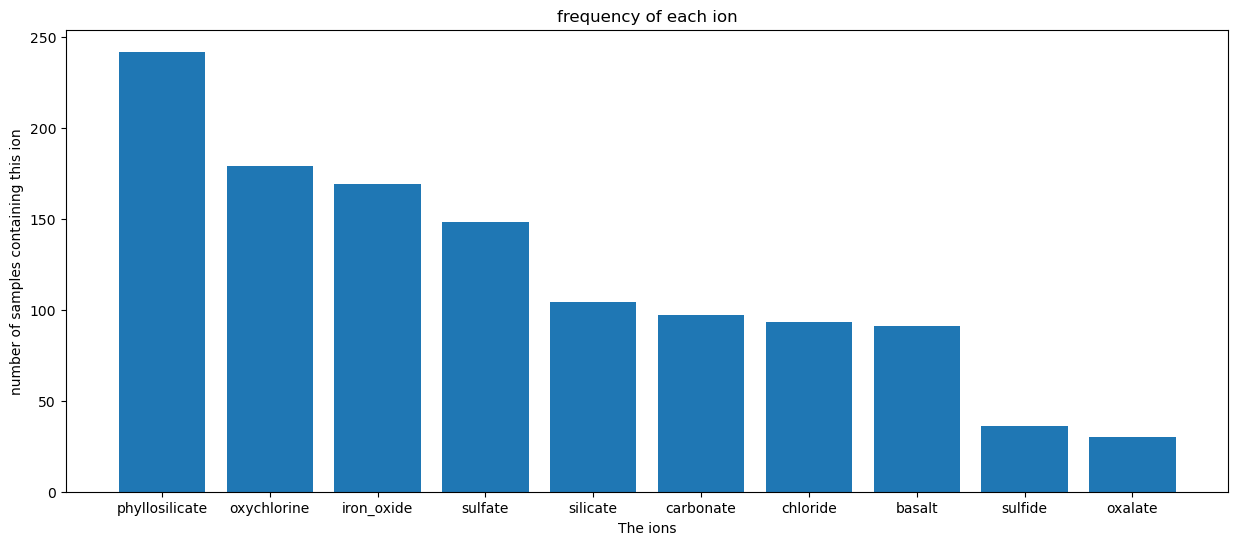

In [1104]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))

plt.bar( sums_normalized.index.values, sums_normalized.values)

plt.title('frequency of each ion')

plt.xlabel("The ions")

plt.ylabel("number of samples containing this ion")

plt.show()



For a collection of samples we plot temperature as a function of time.

In [1128]:


from random import sample 

samples_list = sample(list(train_files.keys()),num_samples)

num_samples = len(samples_list)


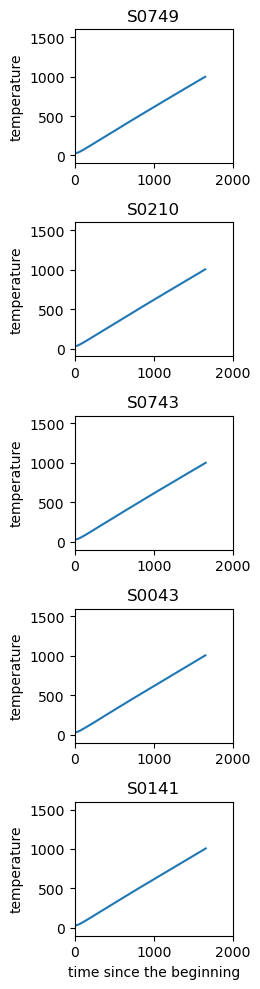

In [1129]:
# Create a figure and an array of subplots indexed using axis

fig, ax = plt.subplots(num_samples,sharey = True,height_ratios=0.4*np.ones(num_samples),figsize = (10*num_samples,10))


for i, sample in enumerate(samples_list): 

    df = pd.read_csv(train_files[sample])

    ax[i].plot(df.time,df.temp)
    
    ax[i].set(xlim = (-1,2000),ylim = (-100,1600))

    ax[i].set_aspect('equal','box')
    
    plt.xlabel('time since the beginning')
    
    ax[i].set_ylabel('temperature')
    
    ax[i].set_title(sample)



fig.set_size_inches(14,10)



fig.tight_layout()

plt.show()



One can see the plots corresponding to various samples by running all cells above.

Now we plot the various ions grouped by m/z, on a logarithmic scale.

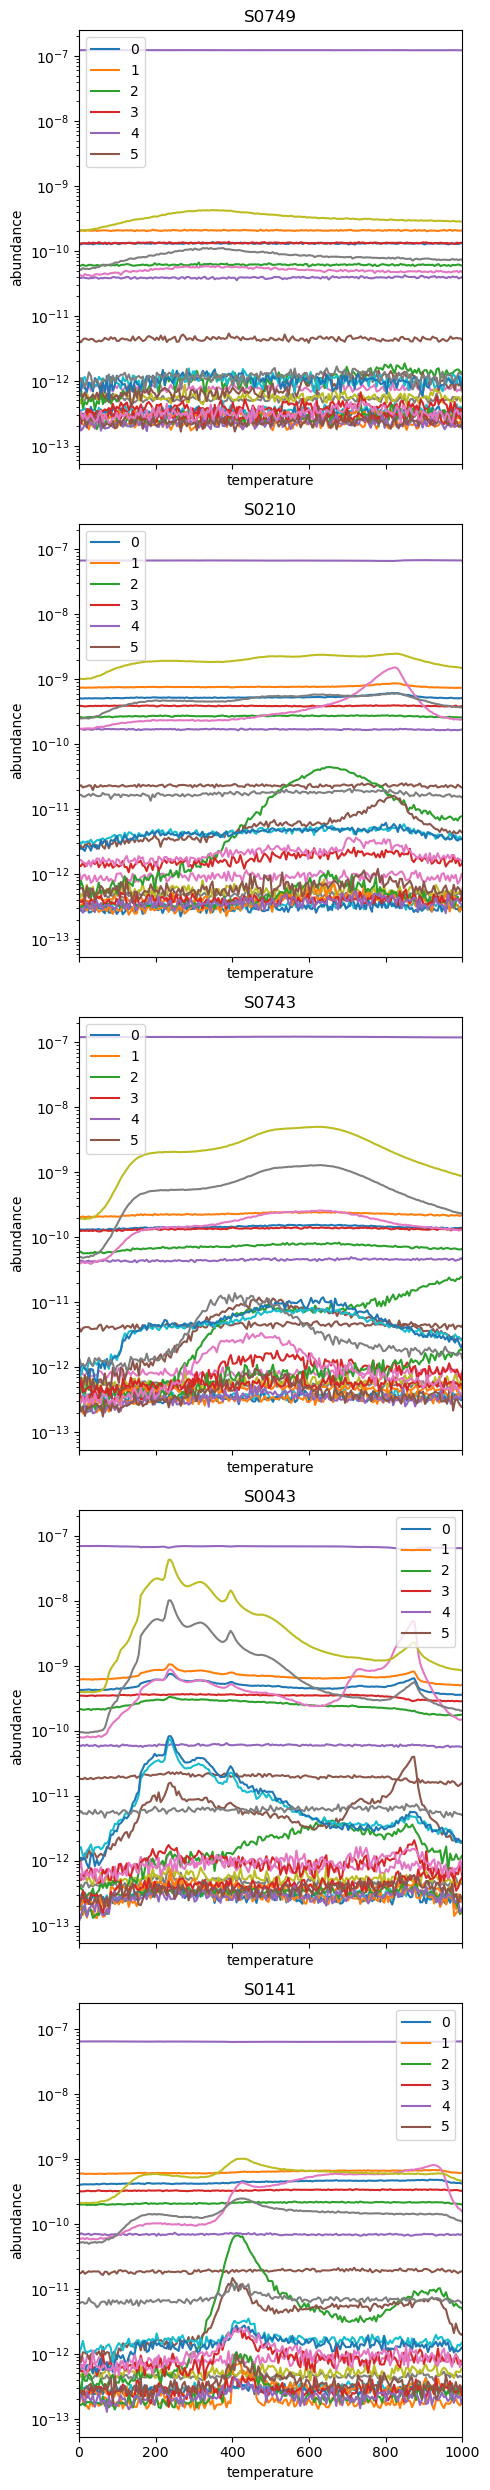

In [1130]:
fig, ax = plt.subplots(num_samples,1,sharex = True,sharey = True,figsize = (5,5*num_samples))


for i, sample in enumerate(samples_list):

    df = pd.read_csv(train_files[sample])
    

    plt.subplot(num_samples,1,i+1)

    

    for mz in range(0,28):
        X = df[df['m/z'] == mz].time
        y = df[df['m/z'] == mz].abundance

        # We show a legend only for the first few values of mz in order to not clutter the picture
             
        if mz<=5:
            plt.plot(X,y,label = str(mz))
        else:
            plt.plot(X,y,label = "")

        
        

        plt.xlabel('temperature')
        plt.ylabel('abundance')
        plt.xlim(0,1000)
        
        # ax[i] = plt.show()
    
    plt.legend()


    
    plt.yscale('log')
    plt.title(sample)
    
    del df


fig.tight_layout()     
    
fig.show()






## Preprocessing the data

We do the data cleaning suggested by the post. Note that the part about removing non-integer values of m/z is probably not relevant to us, it seems that it only applies to SAM samples, which we do not have access to.

In [1108]:
def drop_non_int_and_He(df):
    df2 = df
    df2 = df2[df2['m/z'].transform(round) == df2['m/z']]
    df2 = df2[df2['m/z']<100]
    df2 = df2[df2['m/z'] != 4]
    return df2

In [1109]:
def subtract_min(df):    

    df["abundance_minsub"] = df.groupby(["m/z"])["abundance"].transform(
        lambda x: (x - x.min())
    )

    return df


The next function scales the abundances by the formula $\frac{x-x_{\mathrm{min}}}{x_{max}-x_{min}}$ and forces them to be in the range (0,1)

In [1110]:
from sklearn.preprocessing import minmax_scale

def scale_to_zero_one(df):
    df['zero_one_rescale'] = minmax_scale(df['abundance_minsub'])
    assert (df['zero_one_rescale'].max()<=1)
    return df
    


The following combines the procedures above

In [1111]:
def preprocess(df):
    return scale_to_zero_one(subtract_min(drop_non_int_and_He(df)))

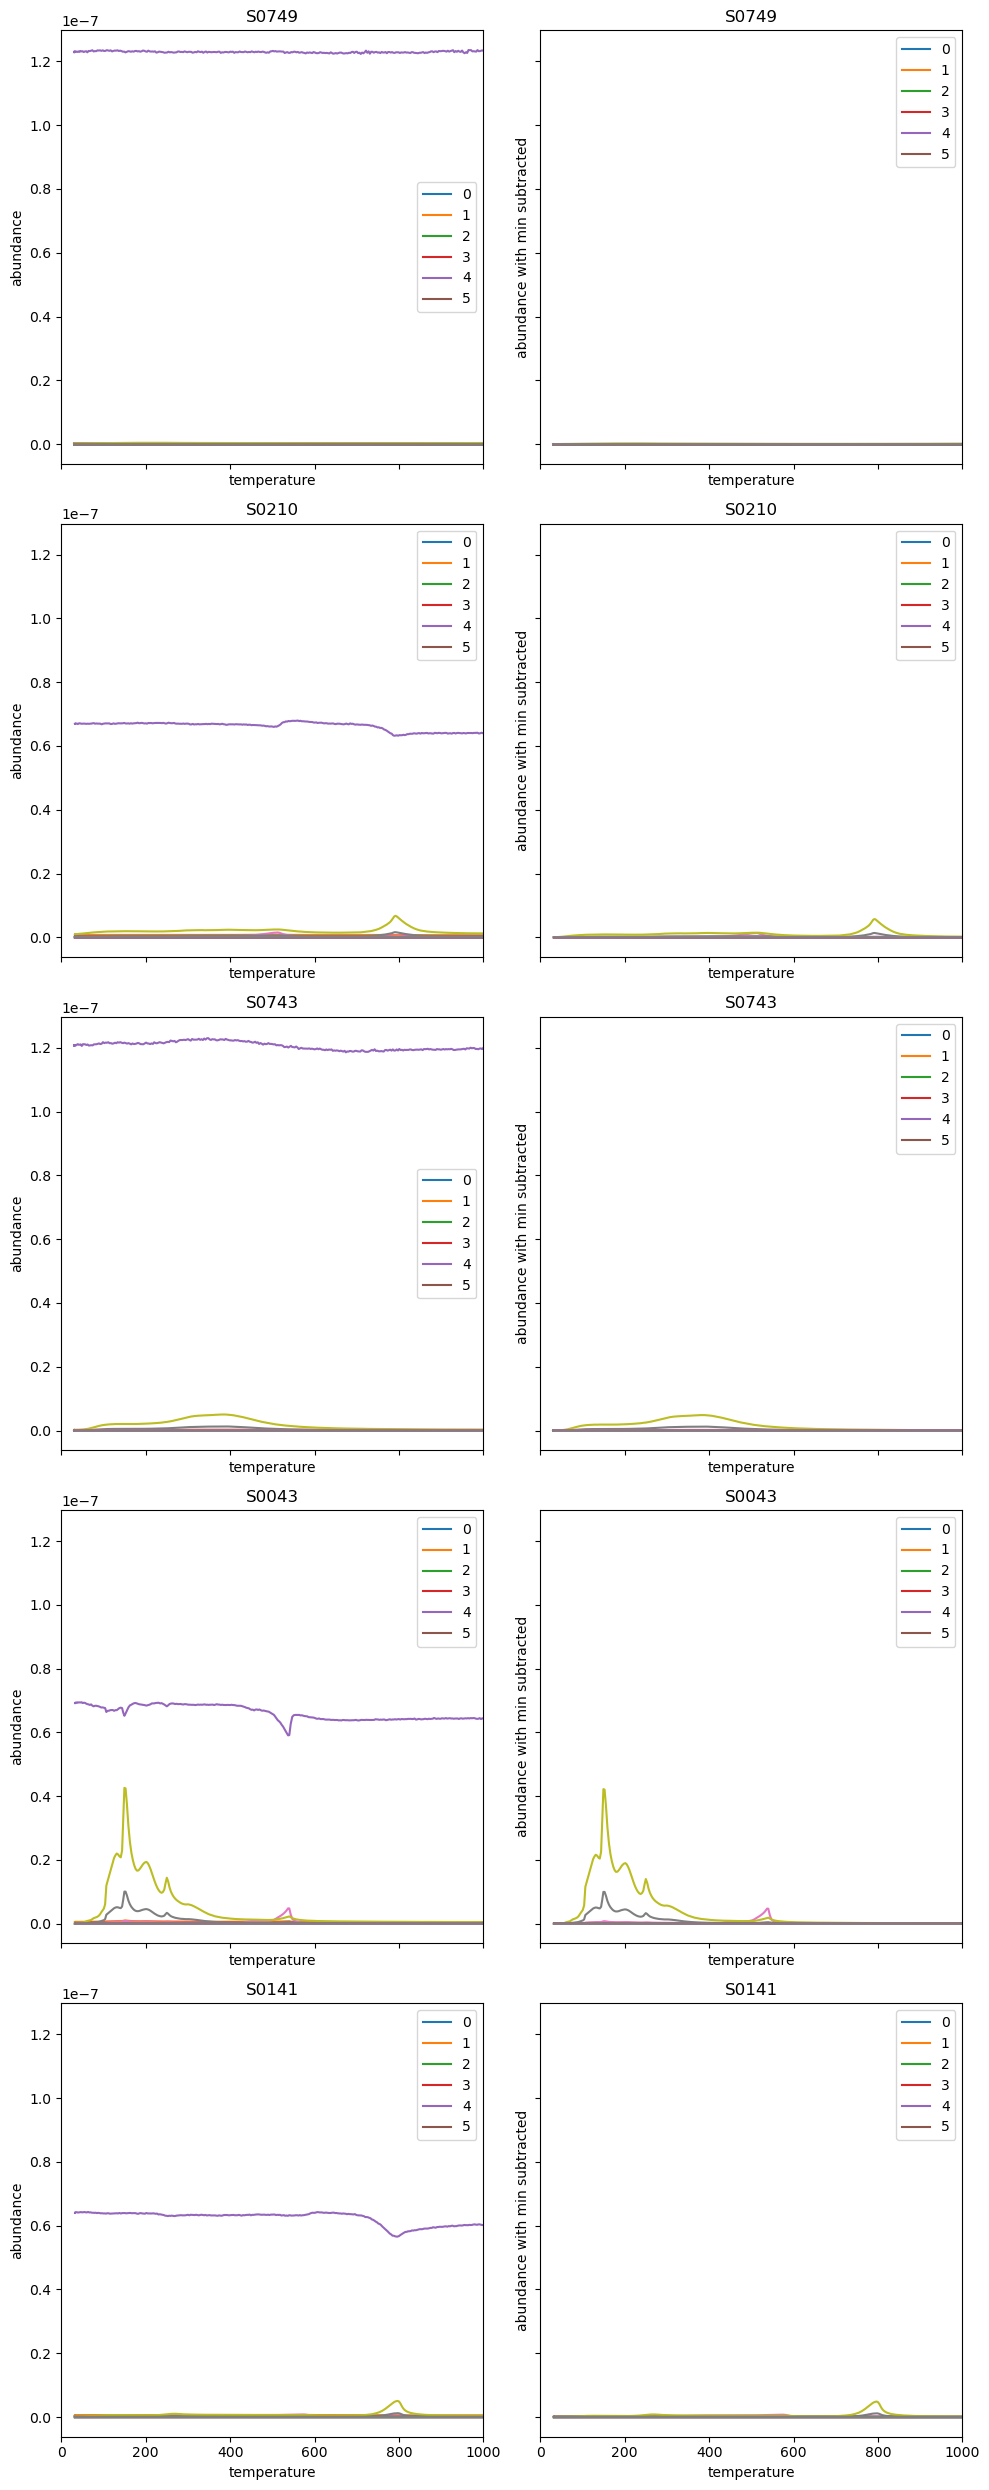

In [1131]:

# samples_list = ['S0001','S0025']
# num_samples = len(samples_list)

fig, ax = plt.subplots(num_samples,2,sharex = True,sharey = True,figsize = (10,5*num_samples))


for i, sample in enumerate(samples_list):



    df = pd.read_csv(train_files[sample])

    df_mod = subtract_min(drop_non_int_and_He(df))



    plt.subplot(num_samples,2,2*i+1)

    

    for mz in range(0,28):
        X = df[df['m/z'] == mz].temp
        y = df[df['m/z'] == mz].abundance

        # We show a legend only for the first few values of mz in order to not clutter the picture
             
        if mz<=5:
            plt.plot(X,y,label = str(mz))
        else:
            plt.plot(X,y,label = "")       
        

        plt.xlabel('temperature')
        plt.ylabel('abundance')
        plt.xlim(0,1000)
        plt.title(sample)

        plt.legend()

        plt.title(sample)
        
        # ax[i] = plt.show()
        plt.yscale('linear')
    
    plt.subplot(num_samples,2,2*i+2)    

    for mz in range(0,28):
        X = df_mod[df_mod['m/z'] == mz].temp
        y = df_mod[df_mod['m/z'] == mz].abundance_minsub

        # We show a legend only for the first few values of mz in order to not clutter the picture
             
        if mz<=5:
            plt.plot(X,y,label = str(mz))
        else:
            plt.plot(X,y,label = "")       
        

        plt.xlabel('temperature')
        plt.ylabel('abundance with min subtracted')
        plt.xlim(0,1000)
        plt.title(sample)
        
        # ax[i] = plt.show()
    
        plt.legend()


    
        plt.yscale('linear')
    
    



fig.tight_layout()     
    
fig.show()





Now we plot our samples with the 0-1 rescaling included

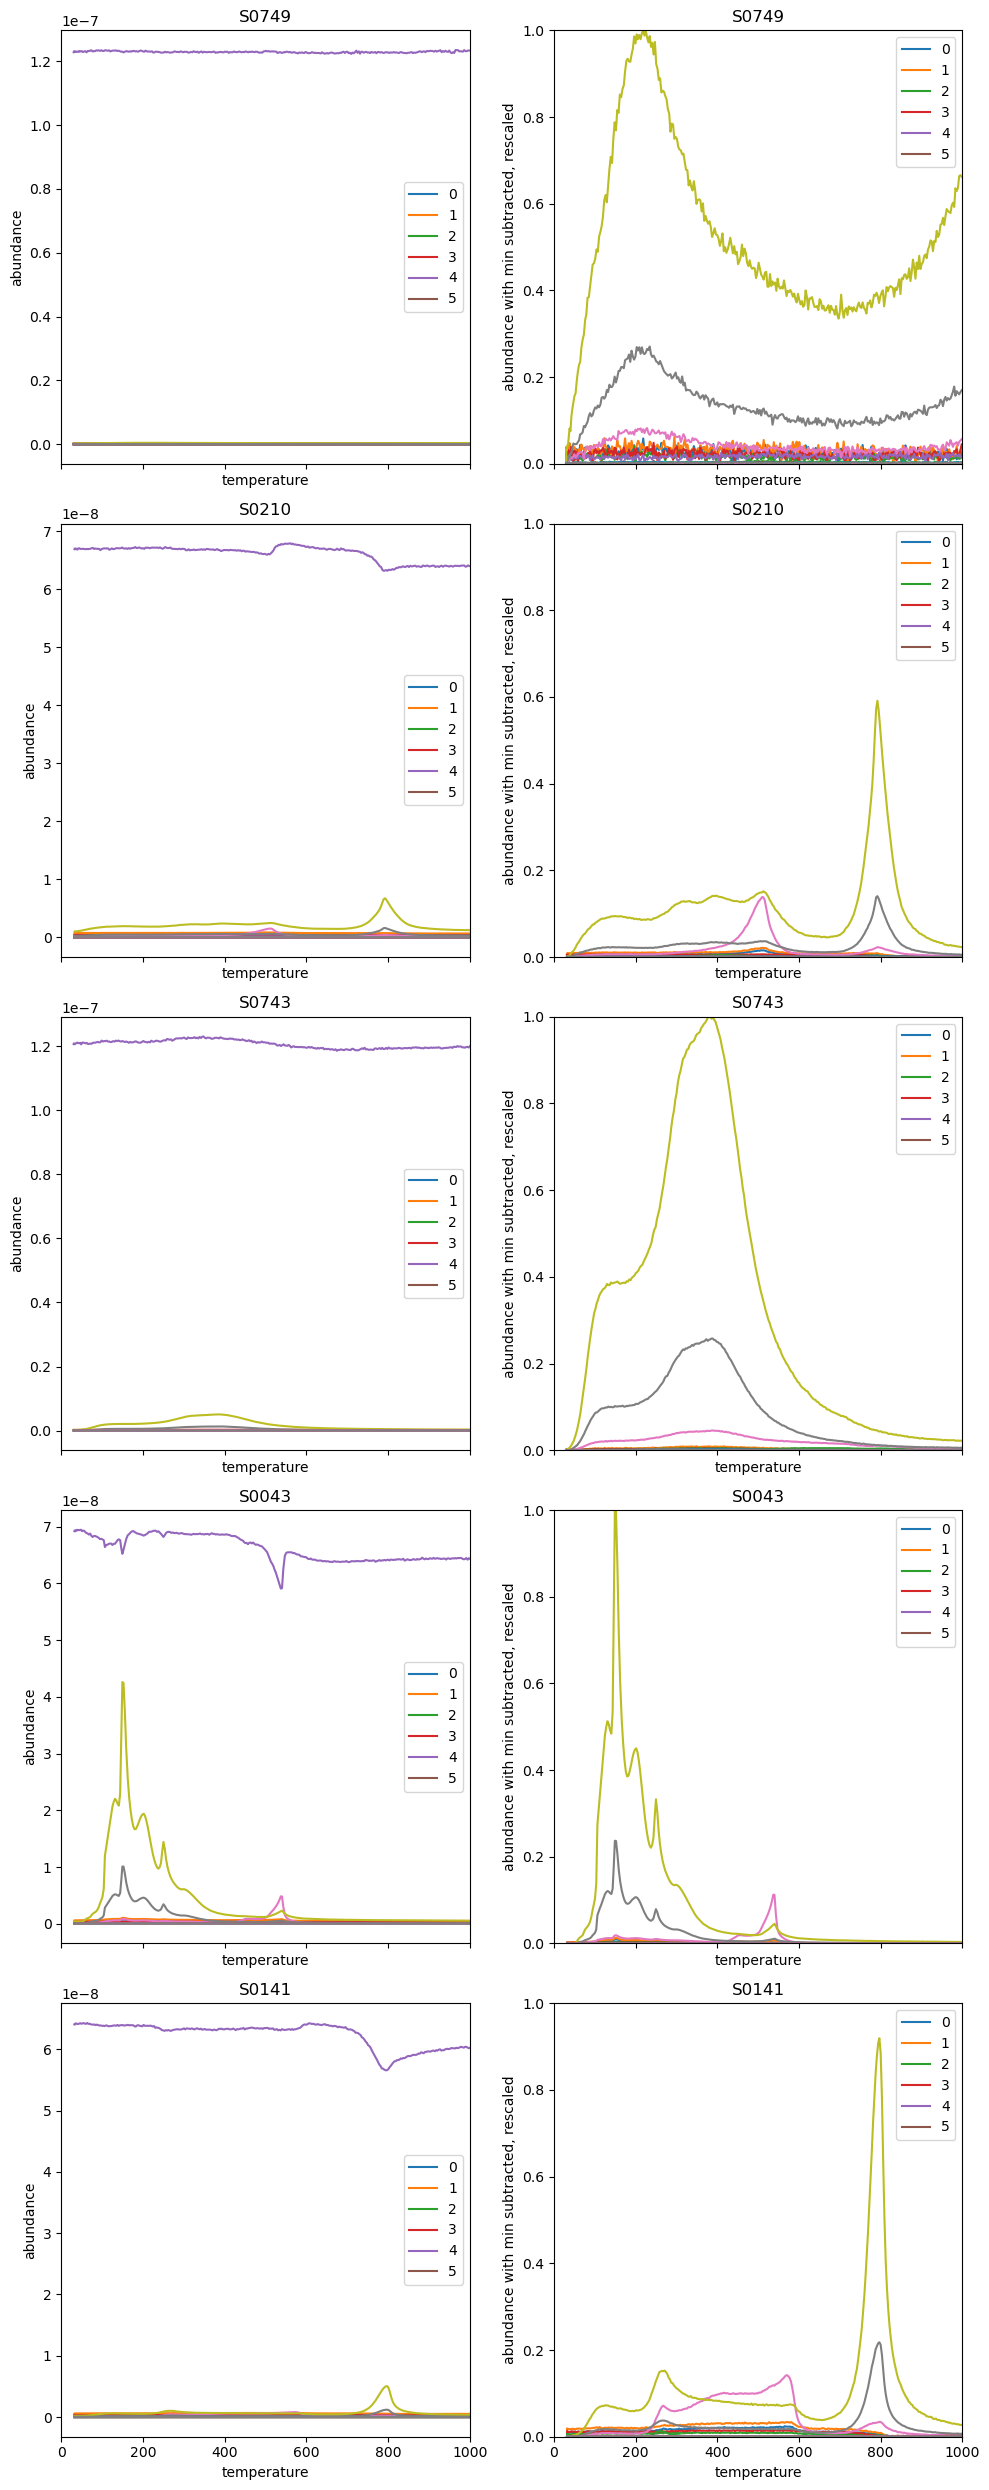

In [1132]:


fig, ax = plt.subplots(num_samples,2,sharex = True,figsize = (10,5*num_samples))




for i, sample in enumerate(samples_list):



    df = pd.read_csv(train_files[sample])

    df_mod = preprocess(df)



    plt.subplot(num_samples,2,2*i+1)

    

    for mz in range(0,28):
        X = df[df['m/z'] == mz].temp
        y = df[df['m/z'] == mz].abundance

        # We show a legend only for the first few values of mz in order to not clutter the picture
             
        if mz<=5:
            plt.plot(X,y,label = str(mz))
        else:
            plt.plot(X,y,label = "")       
        

        plt.xlabel('temperature')
        plt.ylabel('abundance')
        plt.xlim(0,1000)
        plt.title(sample)

        plt.legend()

        plt.title(sample)
        
        # ax[i] = plt.show()
        plt.yscale('linear')
    
    plt.subplot(num_samples,2,2*i+2)    

    for mz in range(0,28):
        X = df_mod[df_mod['m/z'] == mz].temp
        y = df_mod[df_mod['m/z'] == mz].zero_one_rescale

        # We show a legend only for the first few values of mz in order to not clutter the picture
             
        if mz<=5:
            plt.plot(X,y,label = str(mz))
        else:
            plt.plot(X,y,label = "")       
        

        plt.xlabel('temperature')
        plt.ylabel('abundance with min subtracted, rescaled')
        plt.xlim(0,1000)
        plt.ylim(0,1)
        plt.title(sample)
        
        # ax[i] = plt.show()
    
        plt.legend()


    
        plt.yscale('linear')
    
    



fig.tight_layout()     
    
fig.show()





Now we will write a function that picks out the most prominent lines

In [1114]:
# The following takes in a dataframe with a zero_one_rescale column and returns a list 

def find_relevant_ratios(df):

    # The following variable stores all existing ratios in a list, after removing duplicates

    existing_ratios = list(set(df["m/z"].values))

    
    

    # the fist column will store the value of m/z, the second the corresponding mean and the third the std_dev. The fourth is the sum.

    comp_table = np.zeros((len(existing_ratios),4)) 

    for i,ratio_value in enumerate(existing_ratios):
        
        comp_table[i,0] = ratio_value 
        
        df_temp = df.loc[df["m/z"]==ratio_value] # look at the subset of the dataframe corresponding to the ratio
        
        comp_table[i,1] = np.nanmean(df_temp.zero_one_rescale.values)
        comp_table[i,2] = np.nanstd(df_temp.zero_one_rescale.values)
        comp_table[i,3] = comp_table[i,1]+comp_table[i,2]
        
        del df_temp
    
    # now we sort the table with respect to highest sum of mean and standard deviation
    
    comp_table[comp_table[:,3].argsort()[::-1]]

    # we return the num_of_ratios most relevant values of m/z

    return comp_table[comp_table[:,3].argsort()[::-1]][:num_of_ratios,0]



Check that it works:

In [1115]:

df = pd.read_csv(train_files['S0025'])

df_mod = preprocess(df)

print(find_relevant_ratios(df_mod))

[28. 44. 32. 16. 18.]


The following puts together what we have done. It first creates a standardized column, then it selects the most relevant features and gets rid of the rest. It returns a new data frame containing only the most relevant values of m/z

Now create plots to see what's going on

In [1116]:
from random import sample

samples_list = sample(list(train_files.keys()),5)

num_samples = len(samples_list)

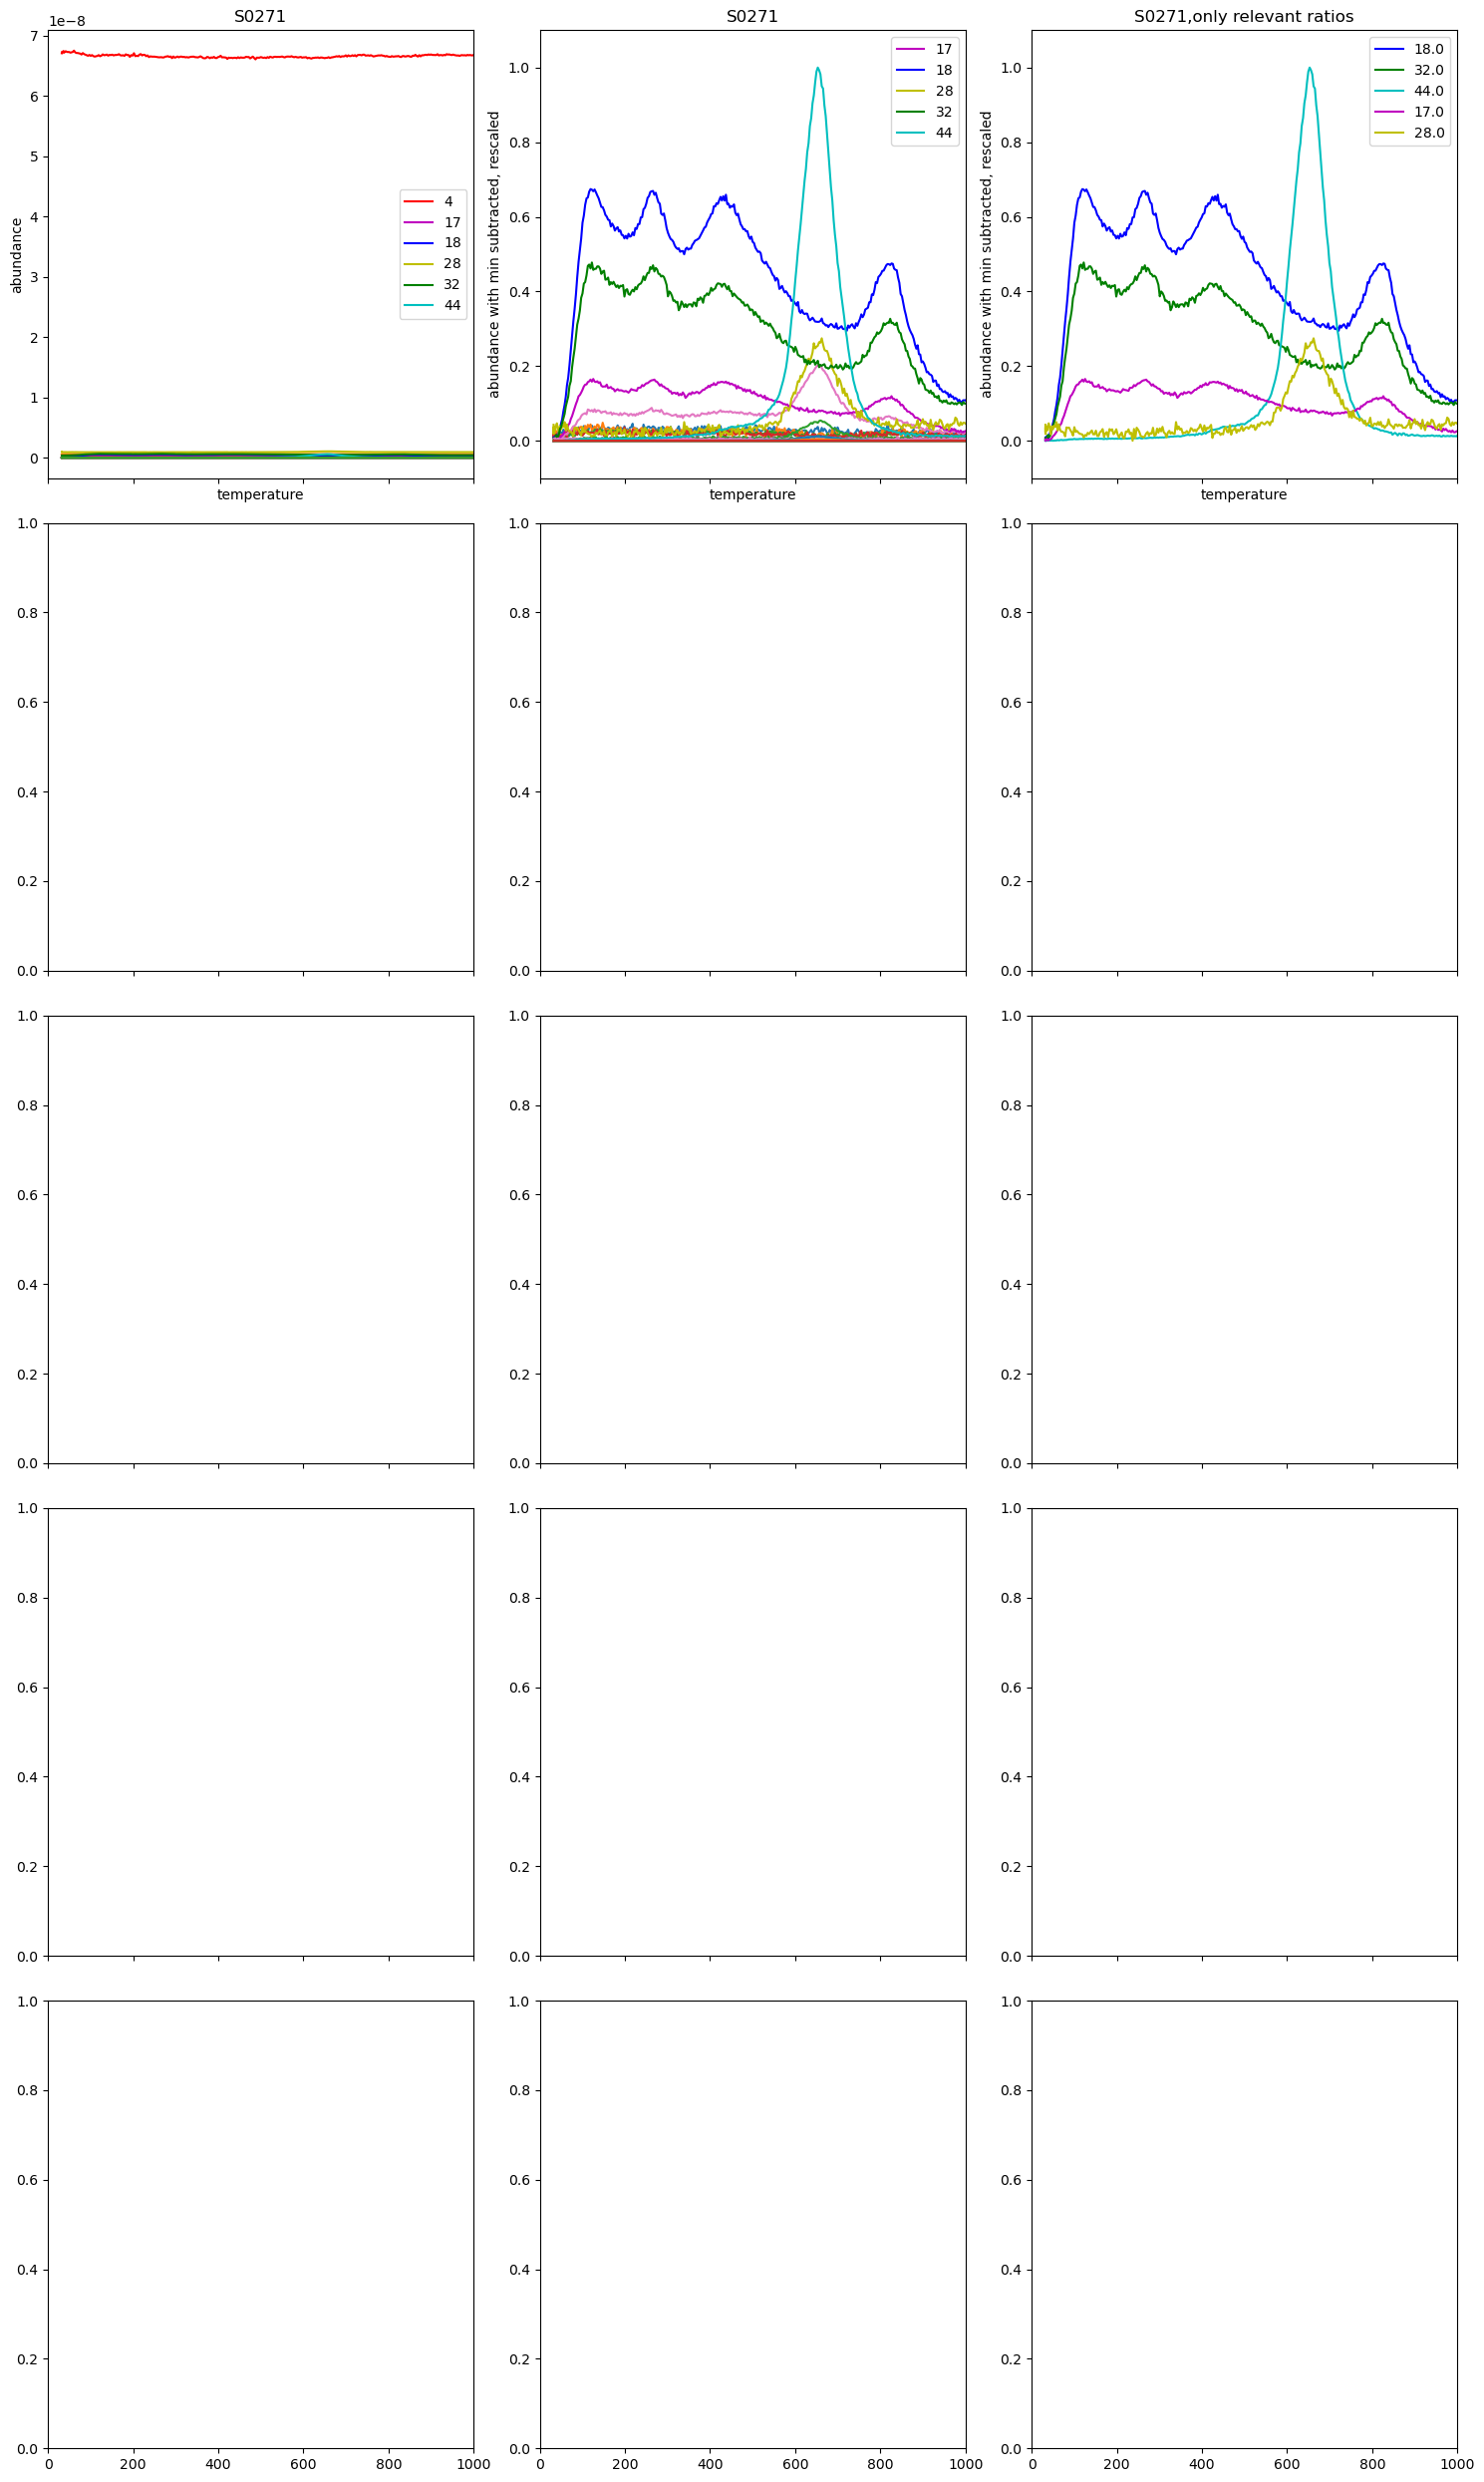

In [1135]:
import warnings
warnings.filterwarnings("ignore") # ignore some annoying warnings

colors = ['b','g','c','m','y','r']



num_columns = 3

fig, ax = plt.subplots(num_samples,num_columns,sharex = True,figsize = (5*num_columns,5*num_samples))


for i, sample in enumerate(samples_list):

    # Load the dataframe

    df = pd.read_csv(train_files[sample])

    # Preprocess it

    df_mod = preprocess(df)

    relevant_ratios = find_relevant_ratios(df_mod)
    

    plt.subplot(num_samples,num_columns,num_columns*i+1)    

    for mz in range(0,99):
        X = df[df['m/z'] == mz].temp
        y = df[df['m/z'] == mz].abundance

        # We show a legend only for the first few values of mz in order to not clutter the picture
             
        if mz in np.append(relevant_ratios,[4]):
            plt.plot(X,y,label = str(mz),color = colors[int(np.where(np.append(relevant_ratios,[4])==mz)[0])])
        else:
            plt.plot(X,y,label = "")       
        

        plt.xlabel('temperature')
        plt.ylabel('abundance')
        plt.xlim(0,1000)
        plt.title(sample)

        plt.legend()

        
        
        # ax[i] = plt.show()
        plt.yscale('linear')
    
    plt.subplot(num_samples,num_columns,num_columns*i+2)    

    for mz in range(0,99):
        X = df_mod[df_mod['m/z'] == mz].temp
        y = df_mod[df_mod['m/z'] == mz].zero_one_rescale

        # We show a legend only for the first few values of mz in order to not clutter the picture
             
        if mz in relevant_ratios:
            plt.plot(X,y,label = str(mz),color = colors[int(np.where(relevant_ratios==mz)[0])])
        else:
            plt.plot(X,y,label = "")       
        

        plt.xlabel('temperature')
        plt.ylabel('abundance with min subtracted, rescaled')
        plt.xlim(0,1000)
        plt.ylim(-0.1,1.1)
        plt.title(sample)
        
        # ax[i] = plt.show()
    
        plt.legend()


    
        plt.yscale('linear')

    plt.subplot(num_samples,num_columns,num_columns*i+3)
    
    for mz in relevant_ratios:
        X = df_mod[df_mod['m/z'] == mz].temp
        y = df_mod[df_mod['m/z'] == mz].zero_one_rescale

        # We show all legends            
        
        plt.plot(X,y,label = str(mz),color = colors[int(np.where(relevant_ratios==mz)[0])])
        
        
        plt.xlabel('temperature')
        plt.ylabel('abundance with min subtracted, rescaled')
        plt.xlim(0,1000)
        plt.ylim(-0.1,1.1)
        plt.title(sample+",only relevant ratios")
        
        # ax[i] = plt.show()
    
        plt.legend()


    
        plt.yscale('linear')

    del df

    



fig.tight_layout()     
    
fig.show()




## Augmenting the train_labels file

We will add columns to it corresponding to the most prominent ratios, at what temperature they peak, what the peak is, and the sum of the average and the std_dev of the rescaled abundance

In [1118]:
train_labels = pd.read_csv("../Data/train_labels.csv",index_col="sample_id")
train_labels

,basalt,carbonate,chloride,iron_oxide,oxalate,oxychlorine,phyllosilicate,silicate,sulfate,sulfide
sample_id,,,,,,,,,,
S0000,0,0,0,0,0,0,0,0,1,0
S0001,0,1,0,0,0,0,0,0,0,0
S0002,0,0,0,0,0,1,0,0,0,0
S0003,0,1,0,1,0,0,0,0,1,0
S0004,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
S0749,0,0,0,0,0,0,0,0,0,0
S0750,0,0,0,0,0,0,1,0,0,0
S0751,0,0,0,0,0,0,0,1,0,0


Add the relevant columns to it, also create a list with the labels so that we can easily access the columns corresponding to each ratio.

In [1119]:
A = [] # the i-th element of this list will contain all features corresponding to the i-th ratio
Pa = [] # Each element of this list will contain peak abundance across ratios
Pt = [] # Each element of this list will contain peak abundance across ratios
PMS = [] # Each element of this list will contain peak mean+std across ratios

for i in range(num_of_ratios):
        
        train_labels[str(i+1)+'_ratio'] = np.nan
        train_labels[str(i+1)+'_ratio_peak_temp'] = np.nan
        train_labels[str(i+1)+'_ratio_peak_abund'] = np.nan
        train_labels[str(i+1)+'_ratio_meanstd_abund'] = np.nan

        A.append([str(i+1)+'_ratio',str(i+1)+'_ratio_peak_temp',str(i+1)+'_ratio_peak_abund',str(i+1)+'_ratio_meanstd_abund'])
        Pt.append(str(i+1)+'_ratio_peak_temp')
        Pa.append(str(i+1)+'_ratio_peak_abund')
        PMS.append(str(i+1)+'_ratio_meanstd_abund')

train_labels


,basalt,carbonate,chloride,iron_oxide,oxalate,oxychlorine,phyllosilicate,silicate,sulfate,sulfide,...,3_ratio_peak_abund,3_ratio_meanstd_abund,4_ratio,4_ratio_peak_temp,4_ratio_peak_abund,4_ratio_meanstd_abund,5_ratio,5_ratio_peak_temp,5_ratio_peak_abund,5_ratio_meanstd_abund
sample_id,,,,,,,,,,,,,,,,,,,,,
S0000,0,0,0,0,0,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
S0001,0,1,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
S0002,0,0,0,0,0,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
S0003,0,1,0,1,0,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
S0004,0,0,0,1,0,1,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S0749,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
S0750,0,0,0,0,0,0,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
S0751,0,0,0,0,0,0,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Populate the columns

In [1120]:

for index, sample in enumerate(train_labels.index): # index corresponds to the index-th sample
    
    df = pd.read_csv(train_files[sample])

    df_mod = preprocess(df)

    relevant_ratios = find_relevant_ratios(df_mod) # this is a list with the most prominent ratios, sorted by prominence

    

    for i in range(len(relevant_ratios)): # i corresponds to the i+1-th most prominent ratio

        label = str(i+1)+'_ratio'

        train_labels[label][index] = relevant_ratios[i]

        

        index_where_max_ab_occurs = df_mod[df_mod['m/z']==relevant_ratios[i]].zero_one_rescale.argmax()
        # this is the pandas version of argmax and returns a scalar, whereas the numpy version returns an array, apparently

        train_labels[label+'_peak_temp'][index] = df_mod[df_mod['m/z']==relevant_ratios[i]].temp.iloc[index_where_max_ab_occurs]

        train_labels[label+'_peak_abund'][index] = df_mod[df_mod['m/z']==relevant_ratios[i]].zero_one_rescale.max()

        train_labels[label+'_meanstd_abund'][index] = df_mod[df_mod['m/z']==relevant_ratios[i]].zero_one_rescale.mean()+df_mod[df_mod['m/z']==relevant_ratios[i]].zero_one_rescale.std()




    del df
    del df_mod
        




train_labels.head() 

,basalt,carbonate,chloride,iron_oxide,oxalate,oxychlorine,phyllosilicate,silicate,sulfate,sulfide,...,3_ratio_peak_abund,3_ratio_meanstd_abund,4_ratio,4_ratio_peak_temp,4_ratio_peak_abund,4_ratio_meanstd_abund,5_ratio,5_ratio_peak_temp,5_ratio_peak_abund,5_ratio_meanstd_abund
sample_id,,,,,,,,,,,,,,,,,,,,,
S0000,0,0,0,0,0,0,0,0,1,0,...,0.024563,0.009736,28.0,35.420,0.010877,0.009101,19.0,105.458,0.006600,0.002841
S0001,0,1,0,0,0,0,0,0,0,0,...,0.033209,0.024006,16.0,497.404,0.093082,0.020585,18.0,-60.370,0.030234,0.019214
S0002,0,0,0,0,0,1,0,0,0,0,...,0.294738,0.075850,16.0,545.304,0.040446,0.013012,1.0,145.673,0.004003,0.001801
S0003,0,1,0,1,0,0,0,0,1,0,...,0.260027,0.061956,28.0,593.222,0.081701,0.031606,16.0,593.222,0.083077,0.028375
S0004,0,0,0,1,0,1,1,0,0,0,...,0.238290,0.082294,16.0,471.733,0.084732,0.026218,44.0,333.273,0.029998,0.013378


Example of how the label thing works:

In [1121]:
train_labels[A[1]].head()

,2_ratio,2_ratio_peak_temp,2_ratio_peak_abund,2_ratio_meanstd_abund
sample_id,,,,
S0000,17.0,103.666,0.276675,0.105220
S0001,2.0,-60.370,0.061658,0.028689
S0002,17.0,145.673,0.254002,0.087770
S0003,44.0,593.222,0.485557,0.147348
S0004,32.0,471.733,0.595652,0.164283


In [1122]:
train_labels[Pt].head()

,1_ratio_peak_temp,2_ratio_peak_temp,3_ratio_peak_temp,4_ratio_peak_temp,5_ratio_peak_temp
sample_id,,,,,
S0000,103.666,103.666,103.666,35.420,105.458
S0001,497.404,-60.370,-60.370,497.404,-60.370
S0002,145.673,145.673,545.304,545.304,145.673
S0003,120.720,593.222,120.720,593.222,593.222
S0004,142.874,471.733,142.874,471.733,333.273


In [1123]:
train_labels[Pa].head()

,1_ratio_peak_abund,2_ratio_peak_abund,3_ratio_peak_abund,4_ratio_peak_abund,5_ratio_peak_abund
sample_id,,,,,
S0000,1.0,0.276675,0.024563,0.010877,0.006600
S0001,1.0,0.061658,0.033209,0.093082,0.030234
S0002,1.0,0.254002,0.294738,0.040446,0.004003
S0003,1.0,0.485557,0.260027,0.081701,0.083077
S0004,1.0,0.595652,0.238290,0.084732,0.029998


Since the ratios are ordered by prominence, the column 1_ratio_meanstd_abund should always have the largest value compared to i_ratio_meanstd_abund

In [1127]:
train_labels[PMS].sample(3)

,1_ratio_meanstd_abund,2_ratio_meanstd_abund,3_ratio_meanstd_abund,4_ratio_meanstd_abund,5_ratio_meanstd_abund
sample_id,,,,,
S0468,0.606940,0.328665,0.166370,0.150787,0.117912
S0642,0.419036,0.113138,0.009581,0.009132,0.004923
S0521,0.686829,0.170254,0.092278,0.077340,0.024643


In [1125]:
train_labels.to_csv("../Data/train_labels_augmented.csv")